# Importing Libraries and Data Visualization

In [2]:
# Some library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn import datasets, preprocessing, linear_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

In [32]:
res = pd.read_csv('/content/drive/MyDrive/CSE422/Project/results.csv') # read csv file
# All columns for frequency histogram
cols = ['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes']

In [ ]:
res.isnull().sum() # Checking null values (not found any)

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [ ]:
for i in res.columns:
  print(f"{i} - {res[i].nunique()}")

Age - 13
Sex - 2
HighChol - 2
CholCheck - 2
BMI - 80
Smoker - 2
HeartDiseaseorAttack - 2
PhysActivity - 2
Fruits - 2
Veggies - 2
HvyAlcoholConsump - 2
GenHlth - 5
MentHlth - 31
PhysHlth - 31
DiffWalk - 2
Stroke - 2
HighBP - 2
Diabetes - 2


In [ ]:
res.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

<Axes: >

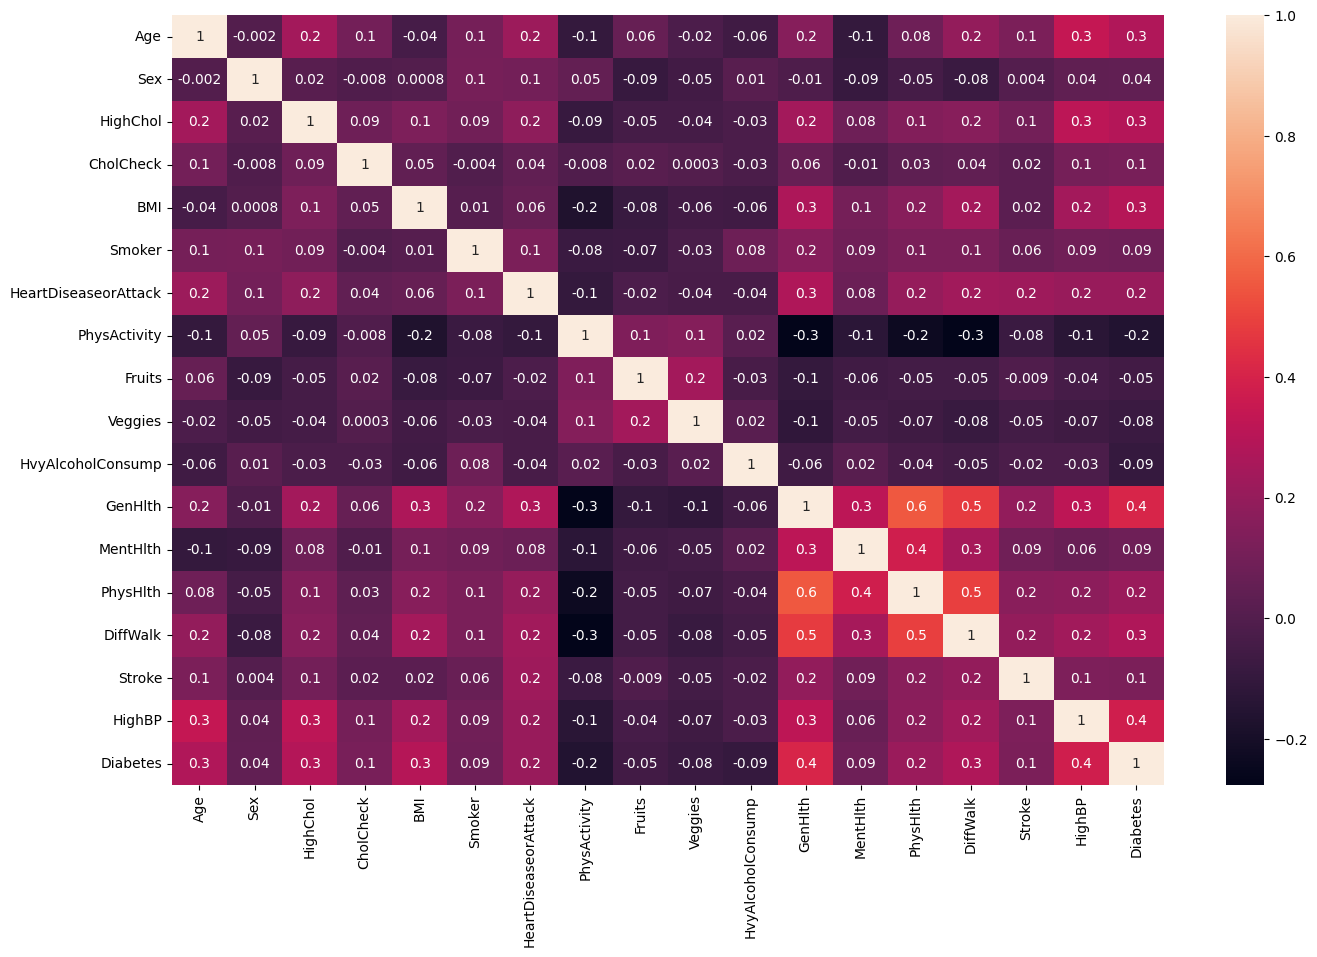

In [33]:
# Correlation. 
# Greater positive means if x increases, y increases and vice-versa
# Greater negative means if x increases, y decreases and vice-versa
plt.figure(figsize=(16,10))
sb.heatmap(res.corr(),annot=True, fmt='.1g')

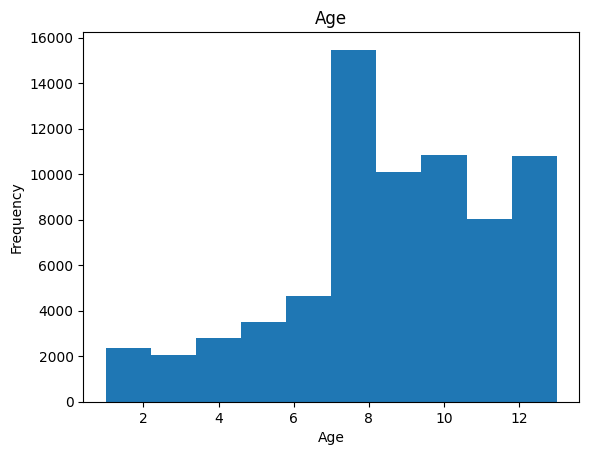

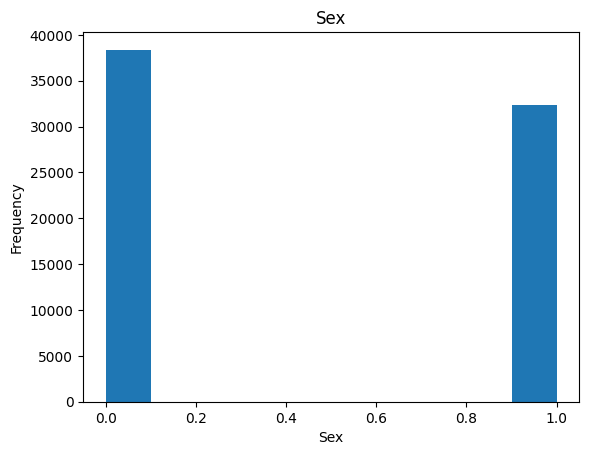

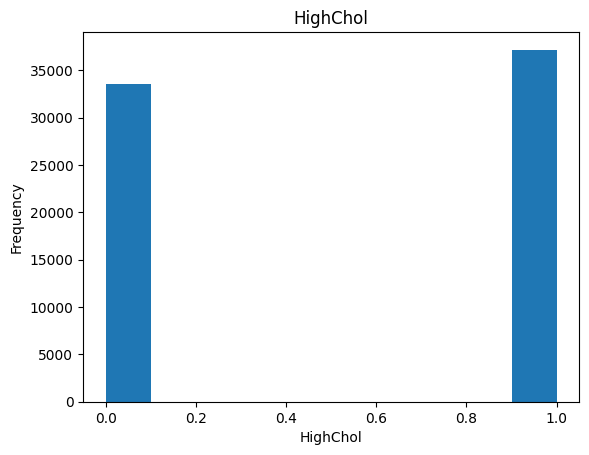

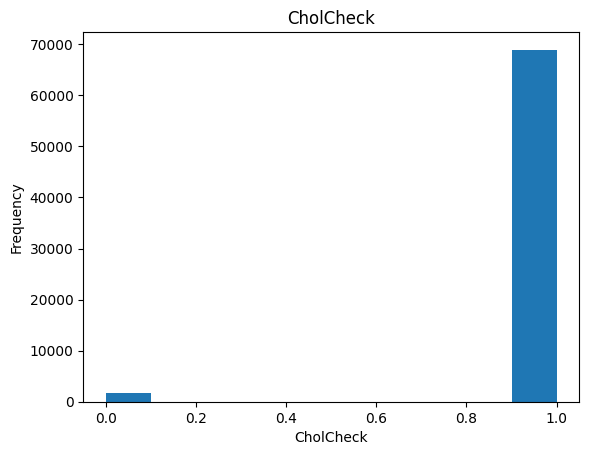

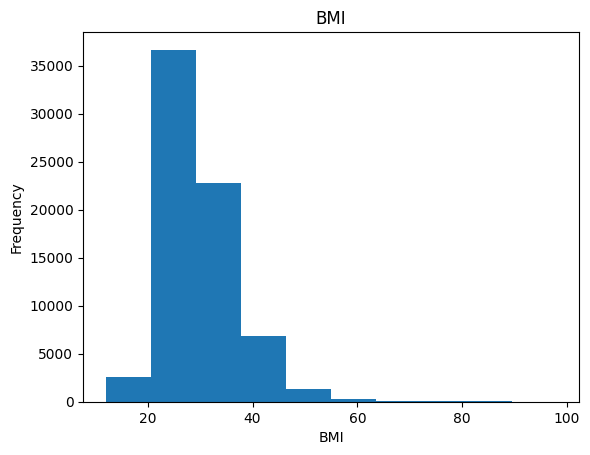

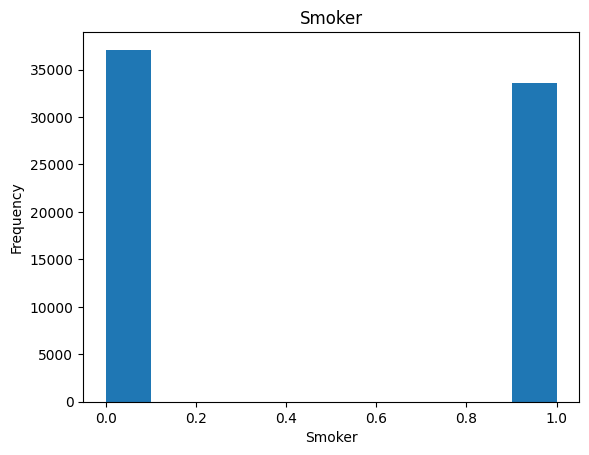

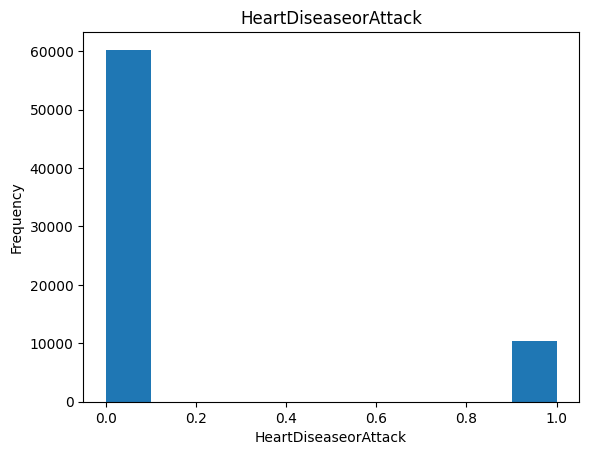

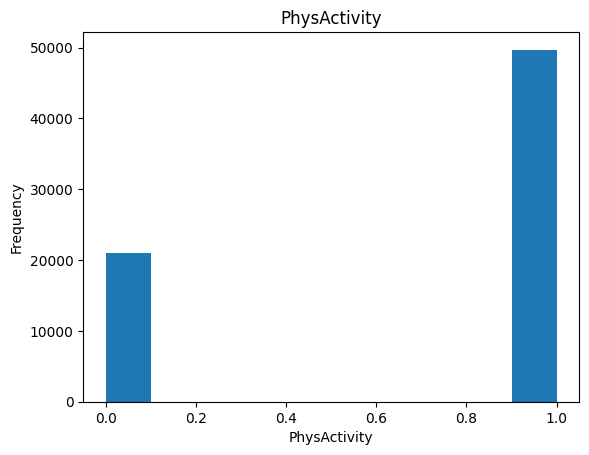

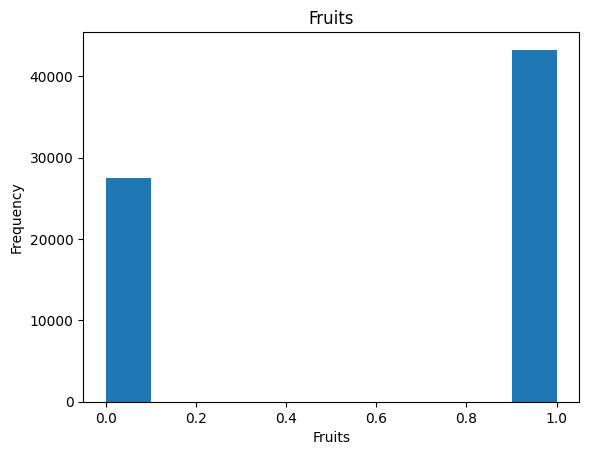

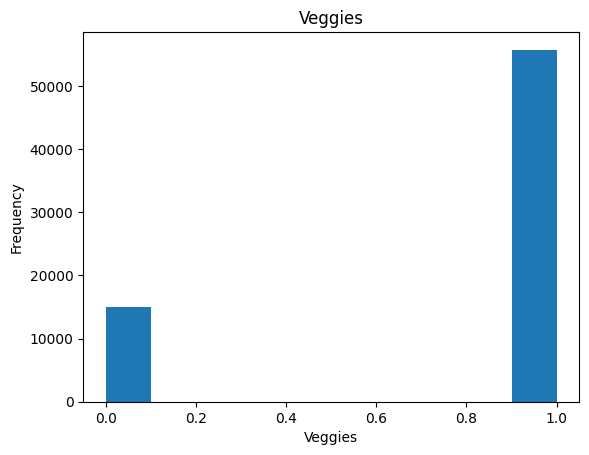

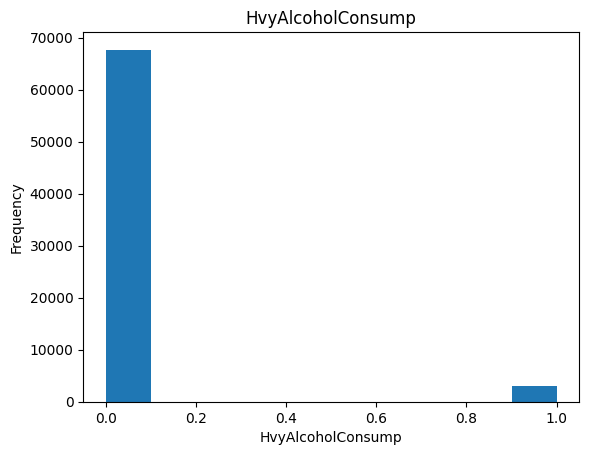

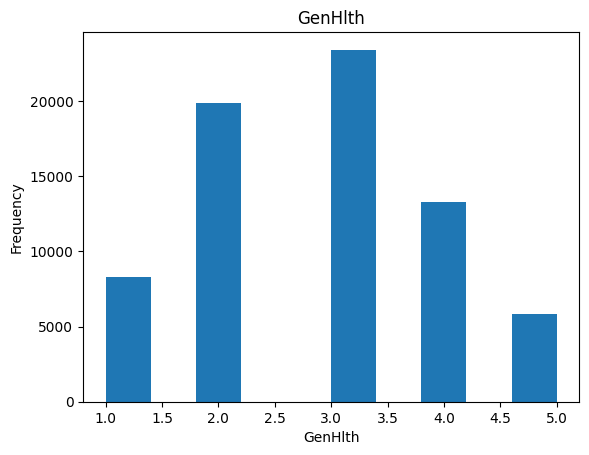

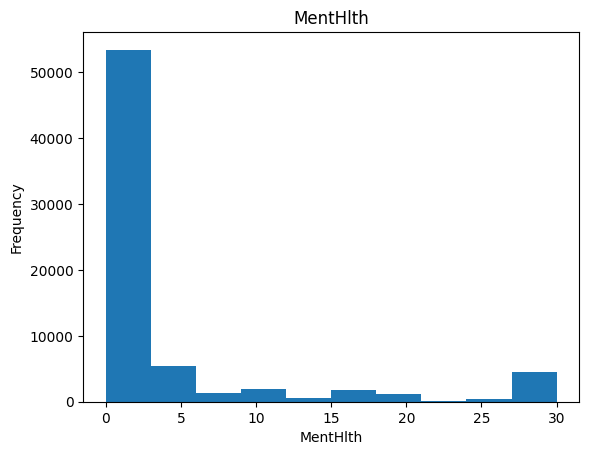

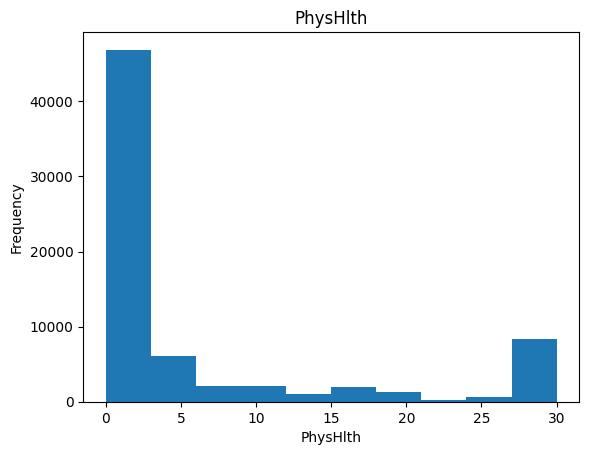

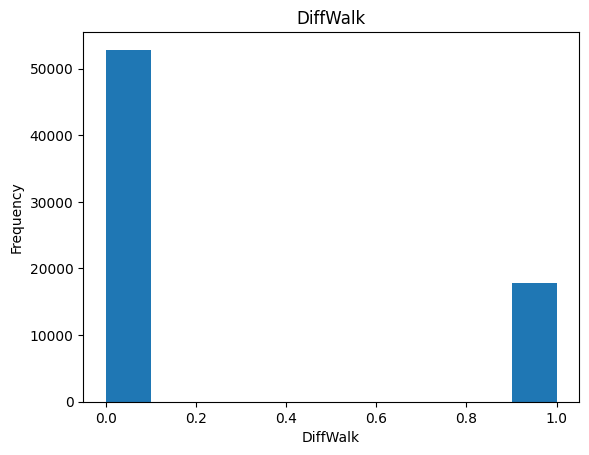

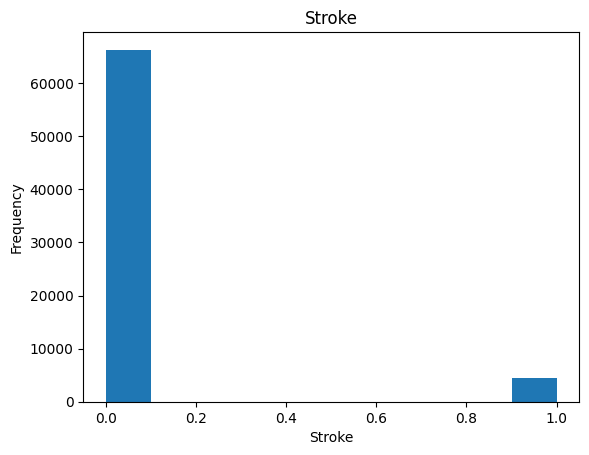

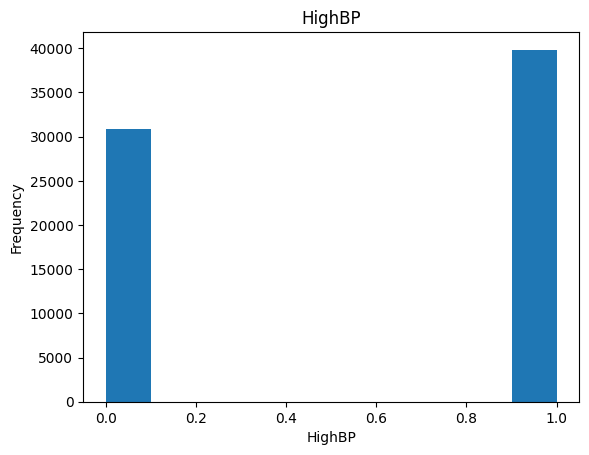

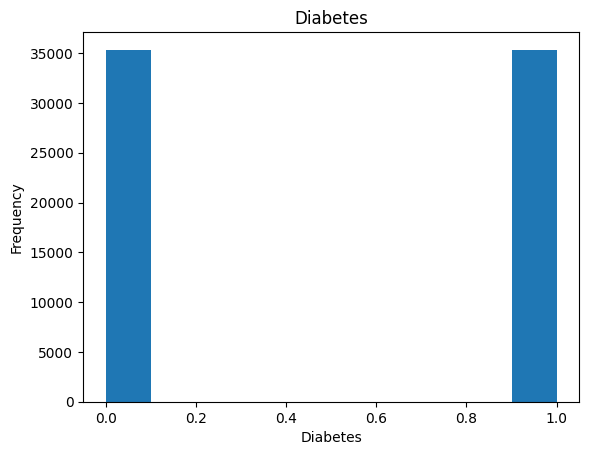

In [ ]:
# Plotting frequency
for i in cols:
    plt.figure()
    plt.hist(res[i])
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.title(f"{i}")
    plt.show()

# Without Data Preprocessing

In [4]:
x = res.drop(['Diabetes'], axis=1) # Excluding diabetes, as it is our target
x

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0


In [5]:
y = res['Diabetes'] # Our target
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
70687    1.0
70688    1.0
70689    1.0
70690    1.0
70691    1.0
Name: Diabetes, Length: 70692, dtype: float64

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=40)

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
print("Training accuracy (%) =", lr.score(x_train,y_train) * 100)
print("Testing accuracy (%) =", lr.score(x_test,y_test)*100)

Training accuracy (%) = 30.637707836234796
Testing accuracy (%) = 30.857688138642402


In [8]:
model = linear_model.LogisticRegression(C=100, fit_intercept=True, solver='lbfgs', max_iter=500)
model = model.fit(x_train, y_train)
y_predict = model.predict(x_test)

acc_training = np.mean(y_train == model.predict(x_train))*100
acc_testing = np.mean(y_test == y_predict)*100
print("Training accuracy (%) =", acc_training)
print("Testing accuracy (%) =", acc_testing)

Training accuracy (%) = 74.69080915043246
Testing accuracy (%) = 74.83025273481705


In [9]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)

print("Training accuracy (%) =", tree.score(x_train,y_train) * 100)
print("Testing accuracy (%) =", tree.score(x_test,y_test)*100)

Training accuracy (%) = 94.01632520643271
Testing accuracy (%) = -31.908489433461963


In [10]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

print("Training accuracy (%) =", tree.score(x_train,y_train) * 100)
print("Testing accuracy (%) =", tree.score(x_test,y_test)*100)

Training accuracy (%) = 97.37692991674076
Testing accuracy (%) = 66.03168615616748


In [11]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(x_train,y_train)

print("Training accuracy (%) =", forest.score(x_train,y_train) * 100)
print("Testing accuracy (%) =", forest.score(x_test,y_test)*100)

Training accuracy (%) = 85.05880391967398
Testing accuracy (%) = 23.698111079800366


In [12]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()
forest.fit(x_train,y_train)

print("Training accuracy (%) =", forest.score(x_train,y_train) * 100)
print("Testing accuracy (%) =", forest.score(x_test,y_test)*100)

Training accuracy (%) = 97.37490906151484
Testing accuracy (%) = 73.26952093549603


In [13]:
from sklearn.neural_network import MLPClassifier # Multi-layer perceptron
model = MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes=(20,5), alpha=0.001, activation="relu") # hl = (number of layer, number of neuron) alpha = regularization term
# how to tune these hyperparameters - activation, hidden layer size


model = model.fit(x_train, y_train)
y_predict = model.predict(x_test)

acc_training = np.mean(y_train == model.predict(x_train))*100
acc_testing = np.mean(y_test == y_predict)*100
print("Training accuracy (%) =", acc_training)
print("Testing accuracy (%) =", acc_testing)

Training accuracy (%) = 74.61401665184707
Testing accuracy (%) = 74.36344775556394


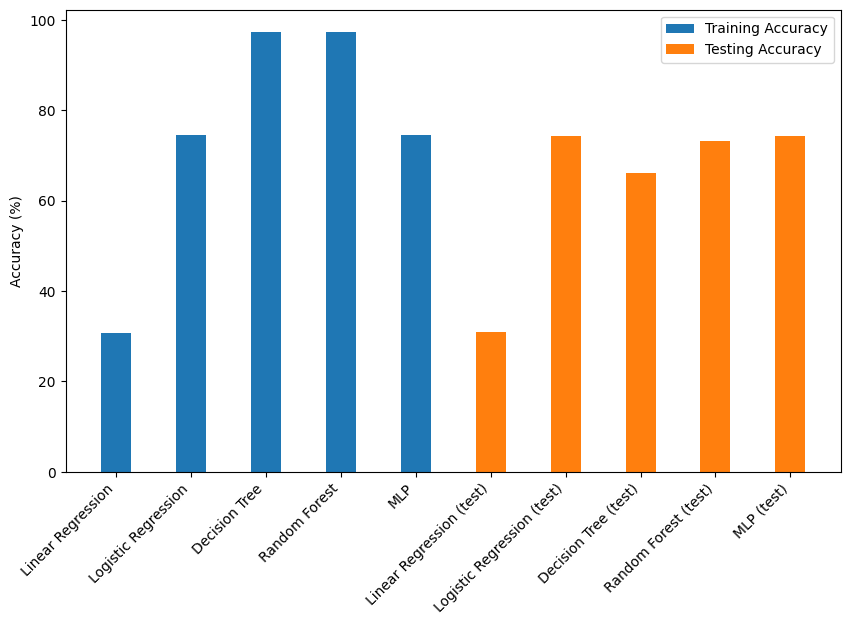

In [14]:
import matplotlib.pyplot as plt

# Create a list of tuples containing the model name and its accuracy scores
models = [('Linear Regression', lr.score(x_train,y_train)*100, lr.score(x_test,y_test)*100),
          ('Logistic Regression', acc_training, acc_testing),
          ('Decision Tree', tree.score(x_train,y_train)*100, tree.score(x_test,y_test)*100),
          ('Random Forest', forest.score(x_train,y_train)*100, forest.score(x_test,y_test)*100),
          ('MLP', acc_training, acc_testing)]

# Create lists for model names, training accuracies, and testing accuracies
model_names = [model[0] for model in models]
training_accs = [model[1] for model in models]
testing_accs = [model[2] for model in models]

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, training_accs, width=0.4, label='Training Accuracy')
plt.bar([name + ' (test)' for name in model_names], testing_accs, width=0.4, label='Testing Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

# With Data Preprocessing

In [15]:
res = pd.read_csv('/content/drive/MyDrive/CSE422/Project/results2.csv') # read csv file, with null values
# All columns for frequency histogram
cols = ['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes']

In [16]:
res.isnull().sum() # Checking null values (found)

Age                     45
Sex                      0
HighChol                 0
CholCheck                0
BMI                     20
Smoker                   0
HeartDiseaseorAttack     0
PhysActivity             0
Fruits                   0
Veggies                  0
HvyAlcoholConsump        0
GenHlth                  0
MentHlth                 0
PhysHlth                 0
DiffWalk                 0
Stroke                   0
HighBP                   0
Diabetes                 0
dtype: int64

In [17]:
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(res[['Age']])
res['Age'] = impute.transform(res[['Age']])

In [18]:
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(res[['BMI']])
res['BMI'] = impute.transform(res[['BMI']])

In [19]:
res.isnull().sum() # Checking null values (not found any)

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='BMI', ylabel='Age'>,
        <Axes: xlabel='Diabetes', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='BMI'>,
        <Axes: xlabel='BMI', ylabel='BMI'>,
        <Axes: xlabel='Diabetes', ylabel='BMI'>],
       [<Axes: xlabel='Age', ylabel='Diabetes'>,
        <Axes: xlabel='BMI', ylabel='Diabetes'>,
        <Axes: xlabel='Diabetes', ylabel='Diabetes'>]], dtype=object)

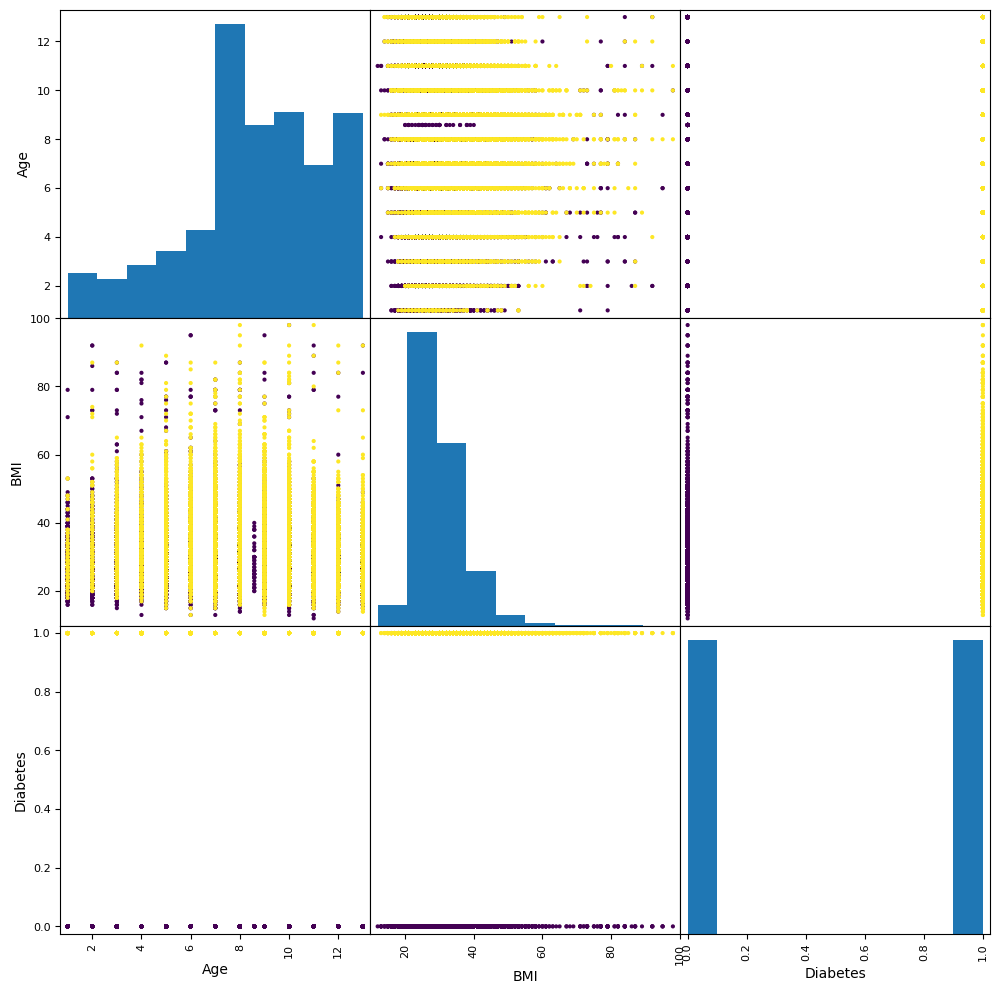

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(res[["Age", "BMI", "Diabetes"]], c=res["Diabetes"] , figsize=(12,12), alpha=1)

In [20]:
res = res.drop([cols[1], cols[5], cols[7], cols[8], cols[9], cols[10], cols[12]], axis=1)
res

,Age,HighChol,CholCheck,BMI,HeartDiseaseorAttack,GenHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,0,1,26.000000,0,3,30,0,0,1,0
1,12.0,1,1,26.000000,0,3,0,0,1,1,0
2,13.0,0,1,29.857723,0,1,10,0,0,0,0
3,11.0,1,1,28.000000,0,3,3,0,0,1,0
4,8.0,0,1,29.000000,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,1,1,37.000000,0,4,0,0,0,0,1
70688,10.0,1,1,29.000000,1,2,0,1,0,0,1
70689,13.0,1,1,25.000000,1,5,0,1,0,1,1
70690,11.0,1,1,18.000000,0,4,0,1,0,1,1


In [21]:
x = res.drop(['Diabetes'], axis=1)
y = res['Diabetes']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [23]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
print("Training accuracy (%) =", lr.score(x_train,y_train) * 100)
print("Testing accuracy (%) =", lr.score(x_test,y_test)*100)

Training accuracy (%) = 30.240534180035617
Testing accuracy (%) = 30.25512661259684


In [25]:
model = linear_model.LogisticRegression(C=100, fit_intercept=True, solver='lbfgs', max_iter=500)
model = model.fit(x_train, y_train)
y_predict = model.predict(x_test)

acc_training = np.mean(y_train == model.predict(x_train))*100
acc_testing = np.mean(y_test == y_predict)*100
print("Training accuracy (%) =", acc_training)
print("Testing accuracy (%) =", acc_testing)

Training accuracy (%) = 74.56147441597284
Testing accuracy (%) = 74.66522067144474


In [26]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

print("Training accuracy (%) =", tree.score(x_train,y_train) * 100)
print("Testing accuracy (%) =", tree.score(x_test,y_test)*100)

Training accuracy (%) = 87.70309595020612
Testing accuracy (%) = 68.29969822708412


In [27]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()
forest.fit(x_train,y_train)

print("Training accuracy (%) =", forest.score(x_train,y_train) * 100)
print("Testing accuracy (%) =", forest.score(x_test,y_test)*100)

Training accuracy (%) = 87.7010750949802
Testing accuracy (%) = 71.53432666918144


In [28]:
from sklearn.neural_network import MLPClassifier # Multi-layer perceptron
model = MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes=(20,5), alpha=0.001, activation="relu") # hl = (number of layer, number of neuron) alpha = regularization term
# how to tune these hyperparameters - activation, hidden layer size


model = model.fit(x_train, y_train)
y_predict = model.predict(x_test)

acc_training = np.mean(y_train == model.predict(x_train))*100
acc_testing = np.mean(y_test == y_predict)*100
print("Training accuracy (%) =", acc_training)
print("Testing accuracy (%) =", acc_testing)

Training accuracy (%) = 75.03233368361491
Testing accuracy (%) = 75.0612976235383


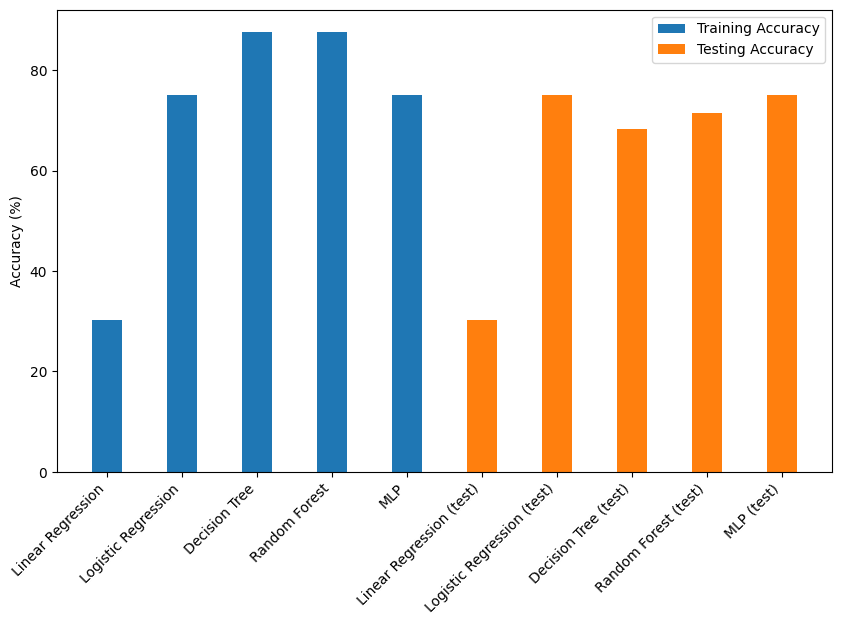

In [30]:
import matplotlib.pyplot as plt

# Create a list of tuples containing the model name and its accuracy scores
models = [('Linear Regression', lr.score(x_train,y_train)*100, lr.score(x_test,y_test)*100),
          ('Logistic Regression', acc_training, acc_testing),
          ('Decision Tree', tree.score(x_train,y_train)*100, tree.score(x_test,y_test)*100),
          ('Random Forest', forest.score(x_train,y_train)*100, forest.score(x_test,y_test)*100),
          ('MLP', acc_training, acc_testing)]

# Create lists for model names, training accuracies, and testing accuracies
model_names = [model[0] for model in models]
training_accs = [model[1] for model in models]
testing_accs = [model[2] for model in models]

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, training_accs, width=0.4, label='Training Accuracy')
plt.bar([name + ' (test)' for name in model_names], testing_accs, width=0.4, label='Testing Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()